In [ ]:
! pip install lime

In [ ]:
import lime
import lime.lime_tabular
import pickle
import sys
import math
import pandas as pd
import pickle as pk
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
#import pickle5 as pickle
import json


In [ ]:
# features_set_D3: 1

def get_graph_features_D3():
    # write feature set into file
    return ['clust_coeff_calc_time', 'connected_components_calc_time', 'degree_assortativity', 'degree_assortativity_calc_time', 'edge_nums', 'edge_count/node_count',
            'eigenvector_centrality_calc_time', 'graph_density', 'clust_coeff_max', 'max_connected_components_size', 'degree_max', 'degrees_spanning_tree_max', 'eigenvector_centrality_max',
            'node_betweenness_centrality_max', 'pagerank_centrality_max', 'shortest_path_length_max', 'max_spanning_tree_calc_time', 'clust_coeff_avg', 'mean_connected_components_size', 'degree_avg',
            'degrees_spanning_tree_avg', 'eigenvector_centrality_avg', 'node_betweenness_centrality_avg', 'shortest_path_length_avg', 'clust_coeff_median', 'median_connected_components_size',
            'degree_median', 'degrees_spanning_tree_median', 'eigenvector_centrality_median', 'node_betweenness_centrality_median', 'pagerank_centrality_median', 'clust_coeff_min',
            'min_connected_components_size', 'degree_min', 'degrees_spanning_tree_min', 'eigenvector_centrality_min', 'node_betweenness_centrality_min', 'pagerank_centrality_min',
            'shortest_path_length_min', 'node_count/edge_count', 'num_connected_components', 'pagerank_centrality_calc_time', 'clust_coeff_var', 'var_connected_components_size', 'degree_var',
            'degrees_spanning_tree_var', 'eigenvector_centrality_var', 'node_betweenness_centrality_var', 'pagerank_centrality_var', 'shortest_path_length_var']

In [ ]:
# features_set_C2D2: 1

def get_graph_features_C2D2():
    # write feature set into file
    return ['clust_coeff_calc_time', 'connected_components_calc_time', 'degree_assortativity', 'degree_assortativity_calc_time', 'eigenvector_centrality_calc_time',
            'max_connected_components_size', 'eigenvector_centrality_max', 'node_betweenness_centrality_max', 'pagerank_centrality_max', 'max_spanning_tree_calc_time',
            'clust_coeff_avg', 'mean_connected_components_size', 'degrees_spanning_tree_avg', 'eigenvector_centrality_avg', 'node_betweenness_centrality_avg', 'pagerank_centrality_avg',
            'shortest_path_length_avg', 'clust_coeff_median', 'median_connected_components_size', 'eigenvector_centrality_median', 'node_betweenness_centrality_median', 'pagerank_centrality_median',
            'clust_coeff_min', 'min_connected_components_size', 'node_betweenness_centrality_min', 'pagerank_centrality_min', 'shortest_path_length_min', 'node_nums', 'pagerank_centrality_calc_time',
             'clust_coeff_var', 'degree_var', 'node_betweenness_centrality_var', 'pagerank_centrality_var']#, 'sampling_percent']

In [ ]:
# features_set_run_time: 1
# to correct
def get_graph_features_run_time():
    # write feature set into file
    return ['clust_coeff_calc_time', 'connected_components_calc_time', 'degree_assortativity_calc_time', 'edge_nums', 'eigenvector_centrality_calc_time', 'graph_density',
            'max_connected_components_size', 'max_spanning_tree_calc_time', 'mean_connected_components_size', 'eigenvector_centrality_avg', 'node_betweenness_centrality_avg',
            'pagerank_centrality_avg', 'median_connected_components_size', 'eigenvector_centrality_median', 'node_betweenness_centrality_median', 'pagerank_centrality_median',
            'min_connected_components_size', 'pagerank_centrality_min', 'shortest_path_length_min', 'node_nums', 'pagerank_centrality_calc_time', 'run_time var', 'sampling_percent', 'pagerank_centrality_var']


In [ ]:
# features_set_run_time: 1
# to correct
def get_graph_features_HPD2():
    # write feature set into file
    return ['clust_coeff_calc_time', 'graph_density', 'max_connected_components_size', 'degree_max', 'degrees_spanning_tree_max', 'mean_connected_components_size', 'pagerank_centrality_avg',
            'degrees_spanning_tree_median', 'node_betweenness_centrality_median', 'shortest_path_length_min', 'node_nums', 'num_connected_components', 'pagerank_centrality_calc_time',
            'var_connected_components_size', 'degree_var', 'degrees_spanning_tree_var']

In [ ]:
# features_set_run_time: 1
# to correct
def get_graph_features_HPD2_LCC():
    # write feature set into file

    return ['connected_components_calc_time', 'degrees_spanning_tree_max', 'pagerank_centrality_avg', 'degrees_spanning_tree_median', 'clust_coeff_min', 'shortest_path_length_min',
            'node_nums', 'var_connected_components_size', 'shortest_path_length_var']#, 'sampling_percent']

In [ ]:
def get_sampler_features():
    return ['sampling_percent', 'forest fire', 'random degree node', 'random edge', 'random jump', 'random node', 'random node edge', 'snowball', 'frontier', 'rank degree', 'induced random edge', 'metropolis hastings random walk', 'expansion', 'sampler_type_node_based', 'sampler_type_edge_based', 'sampler_type_traversal_based']

In [ ]:
def get_features(metric):
    if metric == 'D3':
        return get_graph_features_D3()+get_sampler_features()
    if metric == 'C2D2':
        return get_graph_features_C2D2()+get_sampler_features()
    if metric == 'HPD2':
        return get_graph_features_HPD2()+get_sampler_features()
    if metric == 'HPD2_LCC':
        return get_graph_features_HPD2_LCC()+get_sampler_features()
    if metric == 'run_time':
        return get_graph_features_run_time()+get_sampler_features()

In [ ]:
import xlsxwriter
import math

def write_graphs_features_to_excell(graphs_features_path, excel_file_path):
    graph_features_dic = pickle.load(open(graphs_features_path, 'rb'))

    workbook = xlsxwriter.Workbook(excel_file_path)
    worksheet = workbook.add_worksheet()

    row = 0
    col = 0
    features_cols_dic = {}
    worksheet.write(row, col, 'trial id')
    for trial_id in graph_features_dic:
        first_graph_feature = graph_features_dic[trial_id]
        break
    for feature in first_graph_feature:
        col += 1
        worksheet.write(row, col, feature)
        features_cols_dic[feature] = col

    row = 1
    col = 0

    for graph_ID in graph_features_dic:
        col = 0
        worksheet.write(row, col, graph_ID)
        graph_features = graph_features_dic[graph_ID]
        for feature in graph_features:
            col = features_cols_dic[feature]
            try:
                worksheet.write(row, col, graph_features[feature])
            except:
                pass

        row += 1

    workbook.close()


In [ ]:
!pip install xlsxwriter

In [ ]:
from collections import Counter

root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'
model_num = '2'
feature_set_num = '2'
res_version = '_v4'

for metric in ['HPD2_LCC']:#'HPD2', 'C2D2', 'D3']:#, 'HPD2_LCC', 'run_time']:
  for model_name in ['kNN','RF', 'MLP']:
    test_data_type = 'realworld'
    df = pd.read_csv(root_folder + 'data/model_' + model_num + '/{}{}.csv'.format(metric, res_version))

    train_set = df[(df['partition']=='train')].reset_index()
    test_set_rw_med = df[(df['partition']=='test') & (df['synthetic']=='realworld_medium')].reset_index()
    test_set_rw_large = df[(df['partition']=='test') & (df['synthetic']=='realworld_large')].reset_index()

    frames = [test_set_rw_med, test_set_rw_large]
    test_set = pd.concat(frames).reset_index()
    #features = list(pd.read_csv(open(root_folder + 'results/real_set_1/{}-features-{}-{}-feature-set-{}.csv'.format(model_num, metric, model, feature_set_num), 'rb')).columns)
    #features = [feature.lstrip().rstrip() for feature in features]
    features = get_features(metric)
    trials_info = ['graph_ID', 'sampling algorithm']
    trials_info.extend(features)
    #print('features columns ', trials_info)
    num_features = len(features)
    print('num features ', num_features)
    #features.insert(0, 'graph id')
    #print('train pa', train_set[['partition']])
    train_set_feature_vectors = train_set[features].to_numpy()
    print('train_set_feature_vectors shape ', train_set_feature_vectors.shape)
    test_set_features = test_set[trials_info]
    #test_set_features = test_set[features]
    test_set_features = test_set_features

    #print('test set features vec: ', test_set_features)

    ######################## read runtime model ####################
    model = pk.load(open(root_folder + 'out/models/{}-{}-{}-feature-set-{}.pickle'.format(model_num, model_name, metric, feature_set_num), 'rb'))

    print('loading finished')
    explainer = lime.lime_tabular.LimeTabularExplainer(train_set_feature_vectors, feature_names=features, class_names=[''], verbose=True, mode='regression')

    features_sorted_reverse = sorted(features, key = len, reverse = True)
    #print('selected graphs features ', features_sorted_reverse)
    trials_features_rankings = []
    trials_features_scores = []

    i = 0
    for index, row in test_set_features.iterrows():
        trials_features_rankings.append({})
        trials_features_scores.append({})
        features_vec = row[features].to_numpy()
        print('test features_vec shape ', features_vec.shape)
        trials_features_rankings[i]['graph_ID'] = row['graph_ID']
        trials_features_rankings[i]['sampling algorithm'] = row['sampling algorithm']
        trials_features_rankings[i]['sample rate'] = row['sampling_percent']
        trials_features_scores[i]['graph_ID'] = row['graph_ID']
        trials_features_scores[i]['sampling algorithm'] = row['sampling algorithm']
        trials_features_scores[i]['sample rate'] = row['sampling_percent']

        exp = explainer.explain_instance(features_vec, model.predict, num_features=num_features)
        print(exp)
        exp_list = exp.as_list()
        print('exp list', exp_list)
        entry_indx = 0
        for entry in exp_list:
            entry_indx += 1
            for feature in features_sorted_reverse:
                if feature in entry[0]:
                    print('feature ', feature)
                    print('entry ', entry[0])
                    trials_features_rankings[i][feature] = entry_indx
                    trials_features_scores[i][feature] = entry[1]
                    break

        i += 1

    print('trails features ranking ', trials_features_rankings)
    print('trails features scores ', trials_features_scores)
    features_rankings_path = root_folder + 'results/ML_explainability/features-rankings-model-{}-{}-{}-{}{}'.format(model_num, model_name, metric, test_data_type, res_version)
    features_scores_path = root_folder + 'results/ML_explainability/features-scores-model-{}-{}-{}-{}{}'.format(model_num, model_name, metric, test_data_type, res_version)
    pickle.dump(trials_features_rankings , open(features_rankings_path, 'wb'))
    pickle.dump(trials_features_scores , open(features_scores_path, 'wb'))
    trials_features_rankings_df = pd.DataFrame(trials_features_rankings)
    trials_features_scores_df = pd.DataFrame(trials_features_scores)
    trials_features_rankings_df.to_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-{}-{}-{}{}.csv'.format(model_num, model_name, metric, test_data_type, res_version))
    trials_features_scores_df.to_csv(root_folder + 'results/ML_explainability/features-scores-model-{}-{}-{}-{}{}.csv'.format(model_num, model_name, metric, test_data_type, res_version))


In [ ]:
# top features per data
datasets_mappings = {'test_Real_Cit-HepTh.csv': 'HepTh', 'test_Real_Cora.csv': 'Cora', 'test_Real_Gnutella.csv': 'Gnutella', 'test_Real_Gowalla.csv': 'Gowalla',
                     'test_Real_Internet_Topology.csv': 'Internet', 'test_Real_arxiv_astro_ph.csv': 'Arxiv AstroPhys', 'test_Real_astro_ph.csv': 'AstroPhys',
                     'test_Real_ca-citeseer.csv': 'Citeseer', 'test_Real_cond_mat_2003.csv': 'CondMat-2003', 'test_Real_cond_mat_2005.csv': 'CondMat-2005',
                     'test_Real_dblp.csv': 'dblp', 'test_Real_dblp_small.csv': 'dblp-small', 'test_Real_out.actor-collaboration': 'Actor',
                     'test_Real_out.cit-HepPh': 'HepPh', 'test_Real_tech-RL-caida.csv': 'Caida'}
samplers_abbr = {'sampling_percent': 'rate', 'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS'}
features_abbr = {'graph_ID': 'Graph', 'node_count/edge_count':'|N|/|E|', 'edge_count/node_count':'|E|/|N|', 'shortest_path_length_var': 'var(SPL)', 'clust_coeff_max': 'max(CC)',
                 'eigenvector_centrality_avg': 'avg(EIC)', 'pagerank_centrality_avg': '$\overline{PRC}$', 'pagerank_centrality_median': 'med(PRC)','var_connected_components_size': 'var(CCS)'}
algorithms = ['FF', 'RDN', 'RE','RJ', 'RN','RNE', 'SB', 'FS','RD',  'IRE',  'MHRW','XS']
metric = 'C2D2'
features_ranking_df_rf = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-RF-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
features_ranking_df_knn = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-kNN-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
features_ranking_df_mlp = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-MLP-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
features_ranking_df_rf['model'] = 'RF'
features_ranking_df_mlp['model'] = 'MLP'
features_ranking_df_knn['model'] = 'kNN'
frames = [features_ranking_df_knn, features_ranking_df_rf, features_ranking_df_mlp]
features_ranking_df = pd.concat(frames)
features_ranking_df = features_ranking_df.replace(datasets_mappings)
features_ranking_df = features_ranking_df.rename(columns = samplers_abbr)
features_ranking_df = features_ranking_df.rename(columns = features_abbr)
# to mean over algorithms
#features_ranking_df['sampling algorithms'] = features_ranking_df[algorithms].mean(axis=1)
#features_ranking_df = features_ranking_df.drop(columns=algorithms)

features_ranking_df_new = features_ranking_df.drop(columns=['sampling algorithm', 'model', 'sample rate', 'Unnamed: 0'])
features_ranking_df_group = features_ranking_df_new.groupby(['Graph']).mean()

selected_columns = []
for col in features_ranking_df_group.columns:
  if (features_ranking_df_group[col] < 10.5).any():
    selected_columns.append(col)

selected_columns
# avg of top algorithms
top_algorithms = [alg for alg in selected_columns if alg in algorithms]
print(top_algorithms)
features_ranking_df_group['sampling algorithms'] = features_ranking_df_group[top_algorithms].mean(axis=1)
features_ranking_df_group = features_ranking_df_group.drop(columns=top_algorithms)
selected_columns.append('sampling algorithms')
selected_columns = [col for col in selected_columns if not col in top_algorithms]
###########
round(features_ranking_df_group[selected_columns])


['RD', 'RJ', 'XS', 'RN']


,sampler_type_node_based,sampler_type_traversal_based,sampler_type_edge_based,avg(EIC),avg(PRC),med(PRC),sampling algorithms
Graph,,,,,,,
Actor,9.0,2.0,8.0,21.0,19.0,10.0,5.0
Arxiv AstroPhys,9.0,3.0,7.0,18.0,19.0,22.0,6.0
AstroPhys,9.0,3.0,7.0,10.0,20.0,21.0,6.0
Caida,9.0,3.0,8.0,10.0,9.0,12.0,6.0
Citeseer,9.0,3.0,8.0,11.0,9.0,12.0,6.0
CondMat-2003,8.0,3.0,7.0,10.0,20.0,21.0,6.0
CondMat-2005,8.0,3.0,8.0,10.0,19.0,22.0,6.0
Cora,9.0,3.0,8.0,20.0,8.0,11.0,6.0
Gnutella,8.0,3.0,7.0,18.0,19.0,20.0,6.0


In [ ]:
features_abbr = {'num_connected_components': ''$|CComp|$'', 'mean_connected_components_size': '$CCS_{mean}$', 'min_connected_components_size': '$CCS_{min}$', 'node_betweenness_centrality_var': '$NBC_{var}$', 'eigenvector_centrality_median': '$EIC_{med}$'}
# features rankins per model
features_ranking_df = features_ranking_df.rename(columns = features_abbr)
features_ranking_df_new = features_ranking_df.drop(columns=['sampling algorithm', 'Graph', 'sample rate', 'Unnamed: 0'])
#features_ranking_df_new = features_ranking_df_new.drop(columns=algorithms)
features_ranking_df_group = features_ranking_df_new.groupby(['model']).mean()

selected_columns = []
for col in features_ranking_df_group.columns:
  if (features_ranking_df_group[col] < 10.5).any():
    selected_columns.append(col)

selected_columns
# avg of top algorithms
top_algorithms = [alg for alg in selected_columns if alg in algorithms]
print(top_algorithms)
features_ranking_df_group['sampling algorithms'] = features_ranking_df_group[top_algorithms].mean(axis=1)
features_ranking_df_group = features_ranking_df_group.drop(columns=top_algorithms)
selected_columns.append('sampling algorithms')
selected_columns = [col for col in selected_columns if not col in top_algorithms]
###########
round(features_ranking_df_group[selected_columns])


['RD', 'RJ', 'XS', 'RN', 'MHRW', 'FF', 'SB']


,sampler_type_node_based,$CCS_{min}$,$NBC_{var}$,sampler_type_traversal_based,$EIC_{med}$,sampler_type_edge_based,rate,sampling algorithms
model,,,,,,,,
MLP,19.0,36.0,15.0,3.0,23.0,7.0,9.0,9.0
RF,3.0,24.0,41.0,2.0,10.0,5.0,15.0,11.0
kNN,5.0,4.0,6.0,3.0,12.0,10.0,14.0,18.0


# Aggregated features

In [ ]:
# top features per data
datasets_mappings = {'test_Real_Cit-HepTh.csv': 'HepTh', 'test_Real_Cora.csv': 'Cora', 'test_Real_Gnutella.csv': 'Gnutella', 'test_Real_Gowalla.csv': 'Gowalla',
                     'test_Real_Internet_Topology.csv': 'Internet', 'test_Real_arxiv_astro_ph.csv': 'Arxiv AstroPhys', 'test_Real_astro_ph.csv': 'AstroPhys',
                     'test_Real_ca-citeseer.csv': 'Citeseer', 'test_Real_cond_mat_2003.csv': 'CondMat-2003', 'test_Real_cond_mat_2005.csv': 'CondMat-2005',
                     'test_Real_dblp.csv': 'dblp', 'test_Real_dblp_small.csv': 'dblp-small', 'test_Real_out.actor-collaboration': 'Actor',
                     'test_Real_out.cit-HepPh': 'HepPh', 'test_Real_tech-RL-caida.csv': 'Caida'}
samplers_abbr = {'sampling_percent': 'rate', 'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS'}
features_abbr = {'graph_ID': 'Graph', 'node_count/edge_count':'|N|/|E|', 'edge_count/node_count':'|E|/|N|', 'shortest_path_length_var': 'var(SPL)', 'clust_coeff_max': 'max(CC)',
                 'eigenvector_centrality_avg': 'avg(EIC)', 'pagerank_centrality_avg': ''$\overline{PRC}$'', 'pagerank_centrality_median': 'med(PRC)'}
algorithms = ['FF', 'RDN', 'RE','RJ', 'RN','RNE', 'SB', 'FS','RD',  'IRE',  'MHRW','XS']

overall_df = pd.Dataframe([])
for metric in ['D3', 'C2D2', 'HPD2', 'HPD2_LCC']:
  features_ranking_df_rf = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-RF-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_knn = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-kNN-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_mlp = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-MLP-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_rf['model'] = 'RF'
  features_ranking_df_mlp['model'] = 'MLP'
  features_ranking_df_knn['model'] = 'kNN'
  frames = [features_ranking_df_knn, features_ranking_df_rf, features_ranking_df_mlp]
  features_ranking_df = pd.concat(frames)
  features_ranking_df = features_ranking_df.replace(datasets_mappings)
  features_ranking_df = features_ranking_df.rename(columns = samplers_abbr)
  features_ranking_df = features_ranking_df.rename(columns = features_abbr)
  # to mean over algorithms
  #features_ranking_df['sampling algorithms'] = features_ranking_df[algorithms].mean(axis=1)
  #features_ranking_df = features_ranking_df.drop(columns=algorithms)

  features_ranking_df_new = features_ranking_df.drop(columns=['sampling algorithm', 'model', 'sample rate', 'Unnamed: 0'])
  features_ranking_df_group = features_ranking_df_new.groupby(['Graph']).mean()

  selected_columns = []
  for col in features_ranking_df_group.columns:
    if (features_ranking_df_group[col] < 10.5).any():
      selected_columns.append(col)

  selected_columns
  # avg of top algorithms
  top_algorithms = [alg for alg in selected_columns if alg in algorithms]
  print(top_algorithms)
  features_ranking_df_group['sampling algorithms'] = features_ranking_df_group[top_algorithms].mean(axis=1)
  features_ranking_df_group = features_ranking_df_group.drop(columns=top_algorithms)
  selected_columns.append('sampling algorithms')
  selected_columns = [col for col in selected_columns if not col in top_algorithms]
  ###########
  metric_df = round(features_ranking_df_group[selected_columns])
  frames = [overall_df, metric_df]
  overall_df = pd.concat(frames)
  overall_df['Metric'] = metric



# per model

In [ ]:
from collections import Counter
import pandas as pd


root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'
model_num = '2'
feature_set_num = '2'
test_data_type = 'realworld'
res_version = '_v4'

datasets_mappings = {'test_Real_Cit-HepTh.csv': 'HepTh', 'test_Real_Cora.csv': 'Cora', 'test_Real_Gnutella.csv': 'Gnutella', 'test_Real_Gowalla.csv': 'Gowalla',
                     'test_Real_Internet_Topology.csv': 'Internet', 'test_Real_arxiv_astro_ph.csv': 'Arxiv AstroPhys', 'test_Real_astro_ph.csv': 'AstroPhys',
                     'test_Real_ca-citeseer.csv': 'Citeseer', 'test_Real_cond_mat_2003.csv': 'CondMat-2003', 'test_Real_cond_mat_2005.csv': 'CondMat-2005',
                     'test_Real_dblp.csv': 'dblp', 'test_Real_dblp_small.csv': 'dblp-small', 'test_Real_out.actor-collaboration': 'Actor',
                     'test_Real_out.cit-HepPh': 'HepPh', 'test_Real_tech-RL-caida.csv': 'Caida'}
samplers_abbr = {'sampling_percent': 'Rate', 'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS',
                 }
features_abbr = {'graph_ID': 'Graph', 'node_count/edge_count':'|N|/|E|', 'edge_count/node_count':'|E|/|N|', 'shortest_path_length_var': '$SPL_{var}$', 'clust_coeff_max': '$CC_{max}$',
                 'eigenvector_centrality_avg': '$\overline{EIC}$', 'pagerank_centrality_avg': '$\overline{PRC}$', 'pagerank_centrality_median': '$PRC_{med}$'}
features_abbr.update({'num_connected_components': '|CComp|', 'mean_connected_components_size': '$\overline{CCS}$', 'min_connected_components_size': '$CCS_{min}$', 'node_betweenness_centrality_var': '$NBC_{var}$', 'eigenvector_centrality_median': '$EIC_{med}$',
                        'degrees_spanning_tree_max':'$MSTD_{max}$', 'var_connected_components_size':'$CCS_{var}$'})

algorithms = ['FF', 'RDN', 'RE','RJ', 'RN','RNE', 'SB', 'FS','RD',  'IRE',  'MHRW','XS']
sampling_features = ['sampling algorithms', 'sampler_type_edge_based', 'sampler_type_node_based', 'sampler_type_traversal_based', 'Rate']

overall_df = pd.DataFrame([])
selected_columns = set()
for metric in ['D3', 'C2D2', 'HPD2', 'HPD2_LCC']:
  print()
  features_ranking_df_rf = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-RF-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_knn = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-kNN-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_mlp = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-MLP-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_rf['model'] = 'RF'
  features_ranking_df_mlp['model'] = 'MLP'
  features_ranking_df_knn['model'] = 'kNN'
  frames = [features_ranking_df_knn, features_ranking_df_rf, features_ranking_df_mlp]
  features_ranking_df = pd.concat(frames)
  features_ranking_df = features_ranking_df.replace(datasets_mappings)
  features_ranking_df = features_ranking_df.rename(columns = samplers_abbr)
  features_ranking_df = features_ranking_df.rename(columns = features_abbr)
  features_abbr.update({'num_connected_components': '$|CComp|$', 'mean_connected_components_size': '$CCS_{mean}$', 'min_connected_components_size': '$CCS_{min}$', 'node_betweenness_centrality_var': '$NBC_{var}$', 'eigenvector_centrality_median': '$EIC_{med}$',
                        'degrees_spanning_tree_max':'$DMST_{max}$', 'var_connected_components_size':'$CCS_{var}$'})
  # features rankins per model
  features_ranking_df = features_ranking_df.rename(columns = features_abbr)
  features_ranking_df_new = features_ranking_df.drop(columns=['sampling algorithm', 'Graph', 'sample rate', 'Unnamed: 0'])
  #features_ranking_df_new = features_ranking_df_new.drop(columns=algorithms)
  features_ranking_df_new = features_ranking_df_new.rename(columns={'model': 'Model'})
  features_ranking_df_group = features_ranking_df_new.groupby(['Model']).mean()

  selected_columns_metric = set(sampling_features)
  print('selected_columns_metric before ', selected_columns_metric)
  for col in features_ranking_df_group.columns:
    if (features_ranking_df_group[col] < 10.5).any():
      selected_columns_metric.add(col)

  # avg of top algorithms
  top_algorithms = [alg for alg in selected_columns_metric if alg in algorithms]
  print(top_algorithms)
  features_ranking_df_group['sampling algorithms'] = features_ranking_df_group[top_algorithms].mean(axis=1)
  features_ranking_df_group = features_ranking_df_group.drop(columns=top_algorithms)
  selected_columns_metric = [col for col in selected_columns_metric if not col in top_algorithms]
  metric_df = round(features_ranking_df_group[selected_columns_metric])
  metric_df['Metric'] = metric
  overall_df = pd.concat([overall_df, metric_df])
  print('sele col ', selected_columns_metric)
  selected_columns = selected_columns.union(selected_columns_metric)

selected_columns = [col for col in selected_columns if not col in top_algorithms]
selected_columns = list(set(selected_columns))
selected_columns.append('Metric')

  ###########
overall_df = round(overall_df[selected_columns])
overall_df = overall_df.replace({'NaN':'-'})

overall_df = overall_df.rename(columns = {'sampling algorithms': 'Alg', 'sampler_type_edge_based': 'T-Edge', 'sampler_type_node_based': 'T-Node', 'sampler_type_traversal_based': 'T-Trav', 'model': 'Model'})



In [ ]:
overall_df

,|E|/|N|,$|CComp|$,T-Trav,|N|/|E|,$EIC_{med}$,degree_max,$CCS_{var}$,Alg,T-Node,$NBC_{var}$,$\overline{PRC}$,$CCS_{mean}$,$DMST_{max}$,T-Edge,$CCS_{min}$,$CC_{max}$,Rate,Metric
Model,,,,,,,,,,,,,,,,,,
MLP,9.0,NaN,5.0,16.0,NaN,NaN,NaN,6.0,33.0,NaN,NaN,NaN,NaN,17.0,NaN,36.0,1.0,D3
RF,8.0,NaN,2.0,4.0,NaN,NaN,NaN,14.0,3.0,NaN,NaN,NaN,NaN,9.0,NaN,35.0,13.0,D3
kNN,24.0,NaN,2.0,24.0,NaN,NaN,NaN,15.0,4.0,NaN,NaN,NaN,NaN,7.0,NaN,7.0,8.0,D3
MLP,NaN,NaN,3.0,NaN,23.0,NaN,NaN,8.0,19.0,16.0,NaN,NaN,NaN,7.0,36.0,NaN,9.0,C2D2
RF,NaN,NaN,2.0,NaN,9.0,NaN,NaN,11.0,3.0,41.0,NaN,NaN,NaN,5.0,24.0,NaN,15.0,C2D2
kNN,NaN,NaN,3.0,NaN,11.0,NaN,NaN,18.0,5.0,7.0,NaN,NaN,NaN,10.0,4.0,NaN,14.0,C2D2
MLP,NaN,7.0,8.0,NaN,NaN,24.0,7.0,8.0,2.0,NaN,20.0,19.0,NaN,16.0,NaN,NaN,10.0,HPD2
RF,NaN,27.0,13.0,NaN,NaN,10.0,19.0,7.0,13.0,NaN,12.0,26.0,NaN,10.0,NaN,NaN,5.0,HPD2
kNN,NaN,23.0,16.0,NaN,NaN,26.0,2.0,8.0,15.0,NaN,6.0,4.0,NaN,10.0,NaN,NaN,8.0,HPD2


Heatmap for feature ranking per model

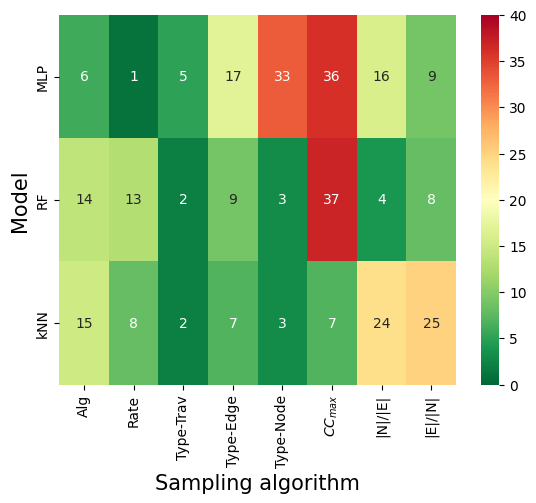

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#overall_df =overall_df.T
overall_df
overall_df_d3 = overall_df[overall_df['Metric']=='D3']
overall_df_d3 = overall_df_d3.drop(columns=['Metric'])
overall_df_d3 = overall_df_d3.dropna(axis=1, how='all')
ax = sns.heatmap(overall_df_d3, annot=True, cmap="RdYlGn_r", vmin=0, vmax=40)#, cbar=False)

plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Model', fontsize = 15) # y-axis label with fontsize 15
fig = ax.get_figure()
#fig.savefig(root_folder + 'out/figures/model_{}/{}_rmse_heatmap_{}.png'.format(model_num, data_types[0], metric),  bbox_inches="tight")

# Feature ranking heatmap - all

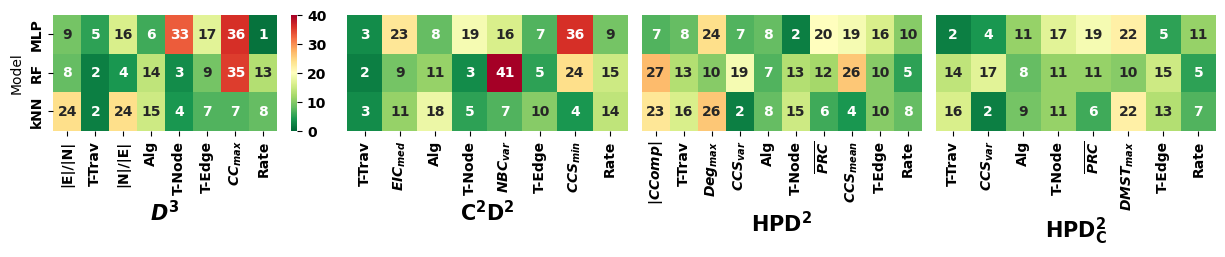

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"

#overall_df.set_index('model')
#overall_df = overall_df.reset_index()
#overall_df = overall_df.T
#overall_df.plot.bar(  fontsize=18,  colormap='RdYlGn', width=0.85)#, legend=False)
fig, (ax,ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(15, 1.5))
fig.subplots_adjust(wspace=0.05)

#overall_df = overall_df.rename({'model': 'Model', 'HPD2':'$HPD^2$', 'C2D2':'$C^2D^2$', 'D3':'$D^3$'})
overall_df = overall_df.rename(columns = {'degree_max':'$Deg_{max}$'})
overall_df_d3 = overall_df[overall_df['Metric']=='D3']
overall_df_d3 = overall_df_d3.drop(columns=['Metric'])
overall_df_d3 = overall_df_d3.dropna(axis=1, how='all')
sns.heatmap(overall_df_d3, ax=ax, annot=True, cmap="RdYlGn_r", vmin=0, vmax=40)#, cbar=False)

#plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('Model', fontsize = 15) # y-axis label with fontsize 15
fig = ax.get_figure()

overall_df_c2d2 = overall_df[overall_df['Metric']=='C2D2']
overall_df_c2d2 = overall_df_c2d2.drop(columns=['Metric'])
overall_df_c2d2 = overall_df_c2d2.dropna(axis=1, how='all')
sns.heatmap(overall_df_c2d2, ax=ax1, annot=True, cmap="RdYlGn_r", vmin=0, vmax=40, cbar=False, yticklabels=False)
ax1.set_ylabel('')

#plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('Model', fontsize = 15) # y-axis label with fontsize 15
fig = ax1.get_figure()

overall_df_hpd2 = overall_df[overall_df['Metric']=='HPD2']
overall_df_hpd2 = overall_df_hpd2.drop(columns=['Metric'])
overall_df_hpd2 = overall_df_hpd2.dropna(axis=1, how='all')
sns.heatmap(overall_df_hpd2, ax=ax2, annot=True, cmap="RdYlGn_r", vmin=0, vmax=40, cbar=False, yticklabels=False)
ax2.set_ylabel('')

#plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('Model', fontsize = 15) # y-axis label with fontsize 15
fig = ax2.get_figure()

overall_df_hpdc = overall_df[overall_df['Metric']=='HPD2_LCC']
overall_df_hpdc = overall_df_hpdc.drop(columns=['Metric'])
overall_df_hpdc = overall_df_hpdc.dropna(axis=1, how='all')
sns.heatmap(overall_df_hpdc, ax=ax3, annot=True, cmap="RdYlGn_r", vmin=0, vmax=40, cbar=False, yticklabels=False)
ax3.set_ylabel('')

#plt.xlabel('Sampling algorithm', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('Model', fontsize = 15) # y-axis label with fontsize 15
fig = ax3.get_figure()

ax.set_xlabel('$D^3$', fontsize = 15)
ax1.set_xlabel('$\mathrm{C^2D^2}$', fontsize = 15)
ax2.set_xlabel('$\mathrm{HPD^2}$', fontsize = 15)
ax3.set_xlabel('$\mathrm{HPD^2_C}$', fontsize = 15)

fig.savefig(root_folder + 'out/figures/model_{}/real_feature_rank_all.pdf'.format(model_num, metric), format='pdf',  bbox_inches="tight")


# Feature ranking per model - barchart


selected_columns_metric before  {'sampling algorithms', 'sampler_type_traversal_based', 'sampler_type_edge_based', 'sampler_type_node_based', 'Rate'}
['RJ', 'MHRW', 'RNE', 'RD', 'SB', 'FF', 'RDN', 'FS', 'RE', 'IRE']
sele col  ['sampling algorithms', 'sampler_type_traversal_based', 'sampler_type_edge_based', 'sampler_type_node_based', 'Rate', '$MSTD_{max}$', '$CCS_{var}$', '$\\overline{PRC}$']


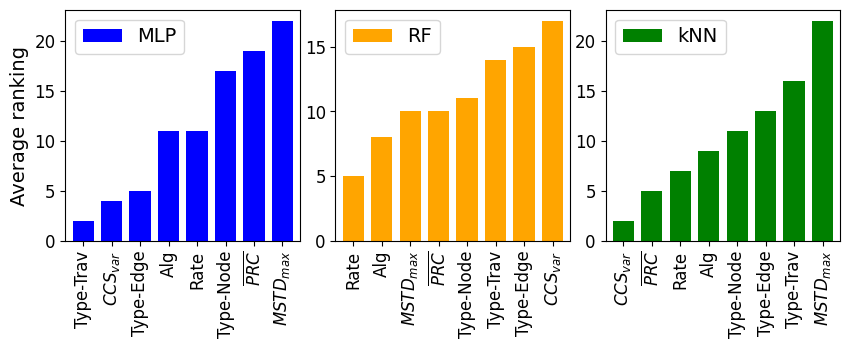

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

#plt.yticks(fontsize=8)
#plt.xticks(fontsize=12)
root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'
model_num = '2'
feature_set_num = '2'
test_data_type = 'realworld'
res_version = '_v3'

datasets_mappings = {'test_Real_Cit-HepTh.csv': 'HepTh', 'test_Real_Cora.csv': 'Cora', 'test_Real_Gnutella.csv': 'Gnutella', 'test_Real_Gowalla.csv': 'Gowalla',
                     'test_Real_Internet_Topology.csv': 'Internet', 'test_Real_arxiv_astro_ph.csv': 'Arxiv AstroPhys', 'test_Real_astro_ph.csv': 'AstroPhys',
                     'test_Real_ca-citeseer.csv': 'Citeseer', 'test_Real_cond_mat_2003.csv': 'CondMat-2003', 'test_Real_cond_mat_2005.csv': 'CondMat-2005',
                     'test_Real_dblp.csv': 'dblp', 'test_Real_dblp_small.csv': 'dblp-small', 'test_Real_out.actor-collaboration': 'Actor',
                     'test_Real_out.cit-HepPh': 'HepPh', 'test_Real_tech-RL-caida.csv': 'Caida'}
samplers_abbr = {'sampling_percent': 'Rate', 'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS',
                 }
features_abbr = {'graph_ID': 'Graph', 'node_count/edge_count':'|N|/|E|', 'edge_count/node_count':'|E|/|N|', 'shortest_path_length_var': '$SPL_{var}$', 'clust_coeff_max': '$CC_{max}$',
                 'eigenvector_centrality_avg': '$\overline{EIC}$', 'pagerank_centrality_avg': '$\overline{PRC}$', 'pagerank_centrality_median': '$PRC_{med}$'}
algorithms = ['FF', 'RDN', 'RE','RJ', 'RN','RNE', 'SB', 'FS','RD',  'IRE',  'MHRW','XS']
sampling_features = ['sampling algorithms', 'sampler_type_edge_based', 'sampler_type_node_based', 'sampler_type_traversal_based', 'Rate']

overall_df = pd.DataFrame([])
selected_columns = set()
for metric in ['HPD2_LCC']:#, 'C2D2', 'HPD2', 'HPD2_LCC']:
  print()
  features_ranking_df_rf = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-RF-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_knn = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-kNN-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_mlp = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-MLP-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_rf['model'] = 'RF'
  features_ranking_df_mlp['model'] = 'MLP'
  features_ranking_df_knn['model'] = 'kNN'
  frames = [features_ranking_df_knn, features_ranking_df_rf, features_ranking_df_mlp]
  features_ranking_df = pd.concat(frames)
  features_ranking_df = features_ranking_df.replace(datasets_mappings)
  features_ranking_df = features_ranking_df.rename(columns = samplers_abbr)
  features_ranking_df = features_ranking_df.rename(columns = features_abbr)
  features_abbr.update({'num_connected_components': '|CComp|', 'mean_connected_components_size': '$\overline{CCS}$', 'min_connected_components_size': '$CCS_{min}$', 'node_betweenness_centrality_var': '$NBC_{var}$', 'eigenvector_centrality_median': '$EIC_{med}$',
                        'degrees_spanning_tree_max':'$MSTD_{max}$', 'var_connected_components_size':'$CCS_{var}$'})
  # features rankins per model
  features_ranking_df = features_ranking_df.rename(columns = features_abbr)
  features_ranking_df_new = features_ranking_df.drop(columns=['sampling algorithm', 'Graph', 'sample rate', 'Unnamed: 0'])
  #features_ranking_df_new = features_ranking_df_new.drop(columns=algorithms)
  features_ranking_df_group = features_ranking_df_new.groupby(['model']).mean()

  selected_columns_metric = set(sampling_features)
  print('selected_columns_metric before ', selected_columns_metric)
  for col in features_ranking_df_group.columns:
    if (features_ranking_df_group[col] < 10.5).any():
      selected_columns_metric.add(col)

  # avg of top algorithms
  top_algorithms = [alg for alg in selected_columns_metric if alg in algorithms]
  print(top_algorithms)
  features_ranking_df_group['sampling algorithms'] = features_ranking_df_group[top_algorithms].mean(axis=1)
  features_ranking_df_group = features_ranking_df_group.drop(columns=top_algorithms)
  selected_columns_metric = [col for col in selected_columns_metric if not col in top_algorithms]
  metric_df = round(features_ranking_df_group[selected_columns_metric])
  metric_df['Metric'] = metric
  overall_df = pd.concat([overall_df, metric_df])
  print('sele col ', selected_columns_metric)
  selected_columns = selected_columns.union(selected_columns_metric)

selected_columns = [col for col in selected_columns if not col in top_algorithms]
selected_columns = list(set(selected_columns))
selected_columns.append('Metric')

  ###########
overall_df = round(overall_df[selected_columns])
overall_df = overall_df.replace({'NaN':'-'})
overall_df = overall_df.rename(columns = {'sampling algorithms': 'Alg', 'sampler_type_edge_based': 'Type-Edge', 'sampler_type_node_based': 'Type-Node', 'sampler_type_traversal_based': 'Type-Trav'})

#overall_df.set_index('model')
overall_df = overall_df.reset_index()
#overall_df = overall_df.T
#overall_df.plot.bar(  fontsize=18,  colormap='RdYlGn', width=0.85)#, legend=False)
fig, (ax,ax1, ax2) = plt.subplots(ncols=3)
fig.subplots_adjust(wspace=0.15)

#colores = {}

overall_df_mlp = overall_df[overall_df['model']=='MLP']
#overall_df
#overall_df = overall_df.rename(columns=overall_df.iloc[0])
overall_df_mlp = overall_df_mlp.drop(columns =['model', 'Metric'])
overall_df_mlp = overall_df_mlp.T
overall_df_mlp
overall_df_mlp = overall_df_mlp.sort_values(by = 0)
cols = list(overall_df_mlp.columns)
color_list = ['blue', 'pink', 'yellow', 'orange', 'red', 'purple', 'green', 'black', 'brown']
colors = {}
i = 0
for col in cols:
  colors[col] = color_list[i]
  i += 1
overall_df_mlp = overall_df_mlp.rename(columns={0:'MLP'})
overall_df_mlp.plot.bar(fontsize=16, ax=ax, width=0.75, color='blue' , figsize=(10,3))# color=overall_df_mlp.columns.map(colors), legend=False)
#ax.set_xlabel("Feature", fontdict={'fontsize':17})
ax.set_ylabel("Average ranking", fontdict={'fontsize':14})
ax.legend(fontsize=14)
fig = ax.get_figure()
#fig.legend(loc='upper left', bbox_to_anchor=(-0.23, 0.7), fontsize=12)

overall_df_rf = overall_df[overall_df['model']=='RF']
#overall_df
#overall_df = overall_df.rename(columns=overall_df.iloc[0])
overall_df_rf = overall_df_rf.drop(columns =['model', 'Metric'])
overall_df_rf = overall_df_rf.T
overall_df_rf = overall_df_rf.sort_values(by = 1)
overall_df_rf = overall_df_rf.rename(columns ={1:'RF'})
overall_df_rf.plot.bar(fontsize=16, ax=ax1, width=0.75, color='orange')# color=overall_df_rf.columns.map(colors), legend=False)
#ax1.set_xlabel("Feature", fontdict={'fontsize':17})
#ax1.set_ylabel("Average ranking", fontdict={'fontsize':17})
ax1.legend(fontsize=14)
#ax1.tick_params(fonts)
fig = ax1.get_figure()


overall_df_knn = overall_df[overall_df['model']=='kNN']
#overall_df
#overall_df = overall_df.rename(columns=overall_df.iloc[0])
overall_df_knn = overall_df_knn.drop(columns =['model', 'Metric'])
overall_df_knn = overall_df_knn.T
overall_df_knn = overall_df_knn.sort_values(by = 2)
overall_df_knn = overall_df_knn.rename(columns ={2:'kNN'})
overall_df_knn.plot.bar(fontsize=16, ax=ax2, width=0.75, color='green')# color=overall_df_knn.columns.map(colors), legend=False)
#ax2.set_xlabel("Feature", fontdict={'fontsize':17})
#ax1.set_ylabel("Average ranking", fontdict={'fontsize':17})
ax2.legend(fontsize=14)
fig = ax2.get_figure()

ax.tick_params(labelsize=12)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

fig.savefig(root_folder + 'out/figures/model_{}/real_feature_rank_{}.pdf'.format(model_num, metric), format='pdf',  bbox_inches="tight")



selected_columns_metric before  {'sampling algorithms', 'sampler_type_traversal_based', 'sampler_type_edge_based', 'sampler_type_node_based', 'rate'}
['RNE', 'RD', 'XS', 'FF', 'FS', 'RE', 'RN']
sele col  ['sampling algorithms', 'sampler_type_traversal_based', '$|N|/|E|$', 'sampler_type_edge_based', 'sampler_type_node_based', '$|E|/|N|$', 'rate', 'max(CC)']


<Axes: xlabel='model'>

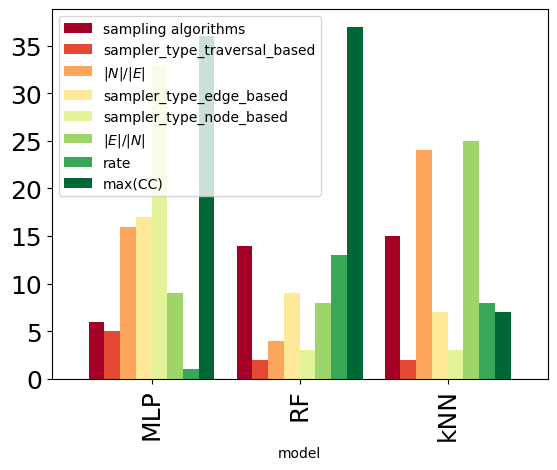

In [ ]:
from collections import Counter
import pandas as pd

root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'
model_num = '2'
feature_set_num = '2'
test_data_type = 'realworld'
res_version = '_v3'

datasets_mappings = {'test_Real_Cit-HepTh.csv': 'HepTh', 'test_Real_Cora.csv': 'Cora', 'test_Real_Gnutella.csv': 'Gnutella', 'test_Real_Gowalla.csv': 'Gowalla',
                     'test_Real_Internet_Topology.csv': 'Internet', 'test_Real_arxiv_astro_ph.csv': 'Arxiv AstroPhys', 'test_Real_astro_ph.csv': 'AstroPhys',
                     'test_Real_ca-citeseer.csv': 'Citeseer', 'test_Real_cond_mat_2003.csv': 'CondMat-2003', 'test_Real_cond_mat_2005.csv': 'CondMat-2005',
                     'test_Real_dblp.csv': 'dblp', 'test_Real_dblp_small.csv': 'dblp-small', 'test_Real_out.actor-collaboration': 'Actor',
                     'test_Real_out.cit-HepPh': 'HepPh', 'test_Real_tech-RL-caida.csv': 'Caida'}
samplers_abbr = {'sampling_percent': 'rate', 'forest fire':'FF', 'random degree node': 'RDN', 'random edge': 'RE', 'random jump': 'RJ', 'random node': 'RN', 'random node edge':'RNE', 'snowball': 'SB', 'frontier': 'FS', 'rank degree': 'RD', 'induced random edge': 'IRE', 'metropolis hastings random walk': 'MHRW', 'expansion': 'XS'}
features_abbr = {'graph_ID': 'Graph', 'node_count/edge_count':'$|N|/|E|$', 'edge_count/node_count':'$|E|/|N|$', 'shortest_path_length_var': 'var(SPL)', 'clust_coeff_max': 'max(CC)',
                 'eigenvector_centrality_avg': 'avg(EIC)', 'pagerank_centrality_avg': '$\overline{PRC}$', 'pagerank_centrality_median': 'med(PRC)'}
algorithms = ['FF', 'RDN', 'RE','RJ', 'RN','RNE', 'SB', 'FS','RD',  'IRE',  'MHRW','XS']
sampling_features = ['sampling algorithms', 'sampler_type_edge_based', 'sampler_type_node_based', 'sampler_type_traversal_based', 'rate']

overall_df = pd.DataFrame([])
selected_columns = set()
for metric in ['D3']:#, 'C2D2', 'HPD2', 'HPD2_LCC']:
  print()
  features_ranking_df_rf = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-RF-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_knn = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-kNN-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_mlp = pd.read_csv(root_folder + 'results/ML_explainability/features-rankings-model-{}-MLP-{}-{}{}.csv'.format(model_num, metric, test_data_type, res_version))
  features_ranking_df_rf['model'] = 'RF'
  features_ranking_df_mlp['model'] = 'MLP'
  features_ranking_df_knn['model'] = 'kNN'
  frames = [features_ranking_df_knn, features_ranking_df_rf, features_ranking_df_mlp]
  features_ranking_df = pd.concat(frames)
  features_ranking_df = features_ranking_df.replace(datasets_mappings)
  features_ranking_df = features_ranking_df.rename(columns = samplers_abbr)
  features_ranking_df = features_ranking_df.rename(columns = features_abbr)
  features_abbr.update({'num_connected_components': '$|CComp|$', 'mean_connected_components_size': '$CCS_{mean}$', 'min_connected_components_size': '$CCS_{min}$', 'node_betweenness_centrality_var': '$NBC_{var}$', 'eigenvector_centrality_median': '$EIC_{med}$',
                        'degrees_spanning_tree_max':'$DMST_{max}$', 'var_connected_components_size':'$CCS_{var}$'})
  # features rankins per model
  features_ranking_df = features_ranking_df.rename(columns = features_abbr)
  features_ranking_df_new = features_ranking_df.drop(columns=['sampling algorithm', 'Graph', 'sample rate', 'Unnamed: 0'])
  #features_ranking_df_new = features_ranking_df_new.drop(columns=algorithms)
  features_ranking_df_group = features_ranking_df_new.groupby(['model']).mean()

  selected_columns_metric = set(sampling_features)
  print('selected_columns_metric before ', selected_columns_metric)
  for col in features_ranking_df_group.columns:
    if (features_ranking_df_group[col] < 10.5).any():
      selected_columns_metric.add(col)

  # avg of top algorithms
  top_algorithms = [alg for alg in selected_columns_metric if alg in algorithms]
  print(top_algorithms)
  features_ranking_df_group['sampling algorithms'] = features_ranking_df_group[top_algorithms].mean(axis=1)
  features_ranking_df_group = features_ranking_df_group.drop(columns=top_algorithms)
  selected_columns_metric = [col for col in selected_columns_metric if not col in top_algorithms]
  metric_df = round(features_ranking_df_group[selected_columns_metric])
  metric_df['Metric'] = metric
  overall_df = pd.concat([overall_df, metric_df])
  print('sele col ', selected_columns_metric)
  selected_columns = selected_columns.union(selected_columns_metric)

selected_columns = [col for col in selected_columns if not col in top_algorithms]
selected_columns = list(set(selected_columns))
selected_columns.append('Metric')

  ###########
overall_df = round(overall_df[selected_columns])
overall_df = overall_df.replace({'NaN':'-'})

overall_df
#overall_df = overall_df.T
#overall_df.set_index('model')
#overall_df = overall_df.reset_index()
#overall_df = overall_df.T
#overall_df = overall_df.T
overall_df.plot.bar(  fontsize=18,  colormap='RdYlGn', width=0.85)#, legend=False)
